<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10><b>Neural Networks Project</b></font></center>

<center><font size=6><b>PART A</b></font></center>

### **Business Context**

![image.png](attachment:c001ca89-6336-4fed-b897-3becd4914101.png)

### **Objective**

![image.png](attachment:6709ba39-ba45-4abe-9f9e-074db0ed5aa0.png)

### **Data Dictionary**

![image.png](attachment:ef05c8a1-030d-45e4-8299-98c91147aabd.png)

<br><br>

## Import the necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical

# Suppressing the warnings.
import warnings
warnings.filterwarnings("ignore")

## Importing the dataset

In [ ]:
data = pd.read_csv('NN Project Data - Signal.csv')

<br>

## Data Overview

**View the first and last 5 rows of the dataset**

In [ ]:
data.head()

In [ ]:
data.tail()

<br>

**Understand the shape of the dataset**

In [ ]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

**Check the data types of the columns for the dataset**

In [ ]:
data.info()

<br>

### Check for missing values

**Check the null columns for the dataset**

In [ ]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})

**Check the NA columns for the dataset**

In [ ]:
missing_values = data.isna().sum()
missing_percentage = (missing_values / len(data)) * 100
pd.DataFrame({'Missing_Values': missing_values, 'Missing_Percentage': missing_percentage})

**Check the duplicate data for the dataset**

In [ ]:
data.duplicated().sum()

In [ ]:
data[data.duplicated()]

**Check the unique values for each parameter and signal strength**

In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values for {column}: {unique_values}\n")

**Remove duplicate data from the dataset**

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

In [ ]:
# checking shape of the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

### Summary
* There are 12 columns, consists of 11 parameters and one target variable
* There is no missing data.
* There were 240 duplicates, which have been removed.
* No treatment required for missing data.

<br>

## Data Analysis & Visualization

### Target Variable: Signal_Strength

In [ ]:
sns.countplot(x='Signal_Strength', data=data)
plt.title('Distribution of Signal_Strength')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [ ]:
sns.boxplot(data, x='Signal_Strength')
plt.show()

**Observations**
* There are very few outliers.

In [ ]:
print(data['Signal_Strength'].value_counts())
print(data['Signal_Strength'].dtype)

<br>

#### Correlation Check against Target Variable: Signal_Strength

In [ ]:
correlation_matrix = data.corr(numeric_only=True)
signal_corr = correlation_matrix['Signal_Strength'].drop('Signal_Strength')
print(signal_corr.sort_values(ascending=False))

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(numeric_only=True)[['Signal_Strength']].sort_values(by='Signal_Strength', ascending=False), annot=True, cmap='Spectral')
plt.title('Correlation of Features with Signal Strength')
plt.show()

NameError: name 'data' is not defined

<Figure size 1000x600 with 0 Axes>

<br>

### Insights:
* Maximum signal strength emitted is 5 and 6
* Parameter 11 is highest positive correlated with Signal Strength
* Parameter 2 is highest negative correlated with Signal Strength

<br>

## Model Building

### Split the data into train and test sets

In [ ]:
X = data.drop(["Signal_Strength"], axis=1)
y = data["Signal_Strength"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Encoding & Label Transformation
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

<br>

## 1. Base Model (One Layer)

### Building the model

In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer for multi-class
])

<br>

### Compile the model

In [ ]:
model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
model.summary()

<br>

### Fit the model

In [ ]:
history = model.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=X_train_scaled.shape[0], validation_data=(X_test_scaled, y_test_encoded))

<br>

### Plot Utility

In [ ]:
def plot_metrics(history, title_suffix):
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Training vs Validation Loss - {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Training vs Validation Accuracy - {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

<br>

### Training Loss and Validation Loss

In [ ]:
plot_metrics(history, 'Base Model (Initial)')

<br>

In [ ]:
metric_data = {
    "Factors": ["Training Loss", "Validation Loss", "Training Accuracy", "Validation Accuracy", "Convergance", "Training Stability", "Generalization"],
}

In [ ]:
metric_data["Base Model"] = [1.35, 1.25, "50%", "55%", "Slow", "Noise", "Not optimal"]

<br>

## 2. Improved Model (Multiple Hidden Layer, Weight Initializers)

In [ ]:
model_improved = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_initializer='he_uniform'),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer='he_uniform'),
    Dense(y_train_encoded.shape[1], activation='softmax')
])

In [ ]:
model_improved.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

In [ ]:
model_improved.summary()

In [ ]:
history_improved = model_improved.fit(X_train_scaled, y_train_encoded, epochs=50, batch_size=X_train_scaled.shape[0], validation_data=(X_test_scaled, y_test_encoded))

In [ ]:
plot_metrics(history_improved, 'Improved Model')

In [ ]:
metric_data["Improved Model"] = [1.15, 1.05, "60%", "65%", "Faster", "Stable", "Excellent"]

## Comparisions:
1.





In [ ]:
metric_df = pd.DataFrame(metric_data)
print(metric_df)

<center><font size=6><b>PART B</b></font></center>

In [8]:
import h5py
import numpy as np
from sklearn.model_selection import train_test_split

In [13]:
# Q1 A - Read the .h5 file and assign to a variable
hf = h5py.File('/content/drive/MyDrive/Colab Notebooks/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

In [16]:
# Q1 B - Print all the keys from the .h5 file
print("Keys:", list(hf.keys()))

Keys: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [17]:
# Q1 C: Split data into X_train, X_test, Y_train, Y_test
X_train = np.array(hf['X_train'])
X_test = np.array(hf['X_test'])
X_val = np.array(hf['X_val'])
y_train = np.array(hf['y_train'])
y_test = np.array(hf['y_test'])
y_val = np.array(hf['y_val'])

hf.close()

In [18]:
# Q2 A - Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
X_val shape: (60000, 32, 32)
y_train shape: (42000,)
y_test shape: (18000,)
y_val shape: (60000,)


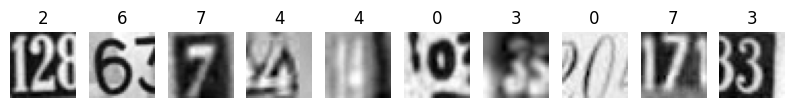

In [21]:
# Q2 B - Visualise first 10 images in train data and print its corresponding labels.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
    plt.title(int(y_train[i]))
plt.show()

In [22]:
# Q2 C - Reshape all the images with appropriate shape update the data in same variable.
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

In [ ]:
# Q2 D - Normalize the images i.e. Normalise the pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

In [ ]:
# Q2 E - Transform Labels into format acceptable by Neural Network
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
# Q2 F - Print total Number of classes in the Dataset
print("Total number of classes:", y_train.shape[1])

Total number of classes: 10
